<a href="https://colab.research.google.com/github/anamaykashiv/StressDetection/blob/main/stresscheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/anamaykashiv/StressDetection/main/Stress.csv")
print(data.head())

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


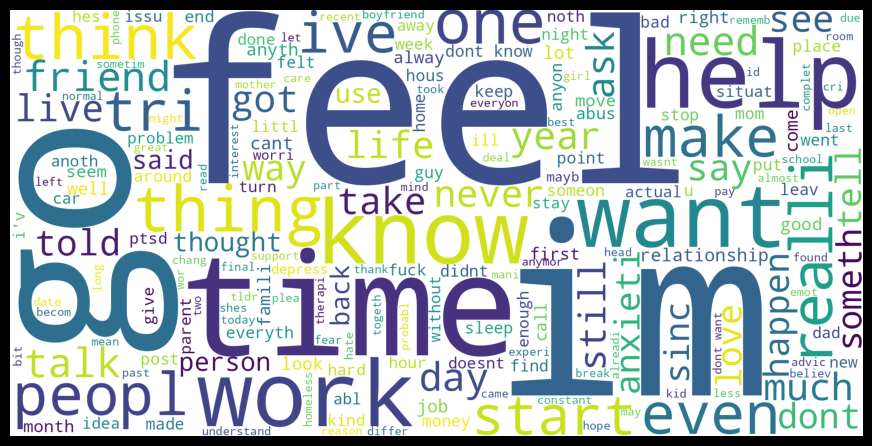

In [ ]:
from enum import auto
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2000,height=1000).generate(text)
plt.figure( figsize=(11,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

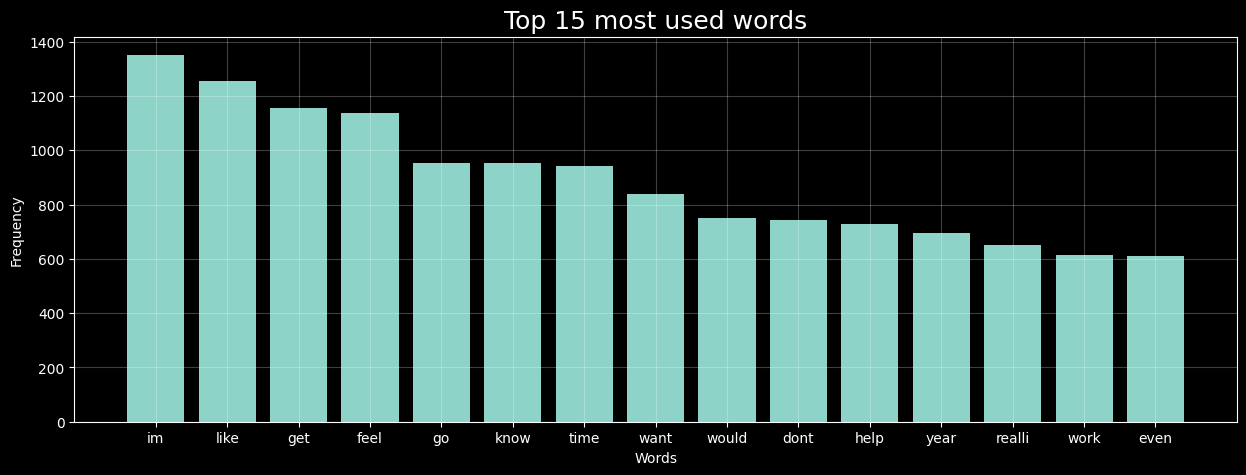

In [ ]:
import collections
words = []
for text in data['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(15))

plt.style.use('dark_background')
plt.figure(figsize = (15, 5))
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.25)
plt.title('Top 15 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show();

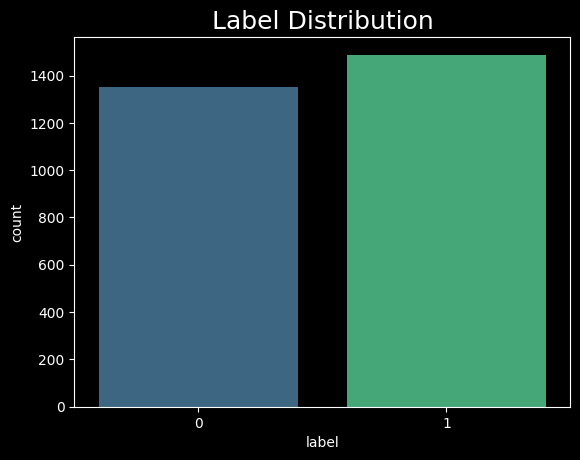

In [ ]:
import seaborn as sns
plt.style.use('dark_background')
sns.countplot(x = data['label'], palette = 'viridis')
plt.title('Label Distribution', fontsize = 18);

In [ ]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.3,
                                                random_state=42
                                                 )

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model = BernoulliNB()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Test Accuracy:{:.2f}%'.format(accuracy * 100))

Test Accuracy:74.18%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(),
    SGDClassifier(),
    MLPClassifier(),
    MultinomialNB(),
    BernoulliNB(),
    SVC()
]





In [ ]:
results = []
user = input("Enter a Text: ")
data = cv.transform([clean(user)]).toarray()

for model in models:
    print('\n#############################################')
    print('Model => {} '.format(type(model).__name__))

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    accuracy  = accuracy_score(ytest, y_pred)


    results.append({
        'Model': type(model).__name__,
        'Accuracy': accuracy*100,

    })

    output = model.predict(data)
    print(output)

    print('Test Accuracy:{:.2f}%'.format(accuracy * 100))

Enter a Text: model.fit(xtrain, ytrain) ypred = model.predict(xtest) accuracy = accuracy_score(ytest, ypred)

#############################################
Model => DecisionTreeClassifier 
['No Stress']
Test Accuracy:59.27%

#############################################
Model => RandomForestClassifier 
['No Stress']
Test Accuracy:71.01%

#############################################
Model => AdaBoostClassifier 
['No Stress']
Test Accuracy:70.07%

#############################################
Model => KNeighborsClassifier 
['No Stress']
Test Accuracy:52.23%

#############################################
Model => ExtraTreesClassifier 
['No Stress']
Test Accuracy:71.13%

#############################################
Model => SGDClassifier 
['No Stress']
Test Accuracy:69.01%

#############################################
Model => MLPClassifier 
['No Stress']
Test Accuracy:71.01%

#############################################
Model => MultinomialNB 
['Stress']
Test Accuracy:73.94%

########

In [ ]:
print(results)

[{'Model': 'DecisionTreeClassifier', 'Accuracy': 59.154929577464785}, {'Model': 'RandomForestClassifier', 'Accuracy': 72.30046948356808}, {'Model': 'AdaBoostClassifier', 'Accuracy': 70.07042253521126}, {'Model': 'KNeighborsClassifier', 'Accuracy': 52.230046948356815}, {'Model': 'ExtraTreesClassifier', 'Accuracy': 71.71361502347418}, {'Model': 'SGDClassifier', 'Accuracy': 70.30516431924883}, {'Model': 'MLPClassifier', 'Accuracy': 70.89201877934272}, {'Model': 'MultinomialNB', 'Accuracy': 73.94366197183099}, {'Model': 'BernoulliNB', 'Accuracy': 74.17840375586854}, {'Model': 'SVC', 'Accuracy': 71.83098591549296}]
